# Overview:

"Trips & Travel.Com" aims to establish a viable business model to expand its customer base. To achieve this, the company plans to introduce a new range of travel packages. Currently, there are five types of packages offered: Basic, Standard, Deluxe, Super Deluxe, and King. An analysis of last year's data revealed that only 18% of customers purchased these packages. The marketing costs were high because customers were contacted at random, without utilizing available data effectively.

### Tasks to Solve :   
        -To predict which customer is more likely to purchase the newly introduced travel package   
        -Which variables are most significant.
        -Which segment of customers should be targeted more.

# PHASE - I
## 1.1 Data Ingestion:
    -The dataset is collected from Kaggle.
    -In this phase, we will load the dataset into a pandas DataFrame to facilitate further analysis. The dataset will be inspected to ensure it has been successfully loaded.

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv("Travel.csv")
df
#comment


,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0


## PHASE - II
### 2.1 Data Understanding:

In this phase, we aim to gain a comprehensive understanding of the dataset. This involves examining the structure, summary statistics, and distributions of the data. Key steps include:

1. **Data Overview**: Reviewing the dataset's columns and data types to understand what kind of information is available.

   - Examine the first few rows of the dataset to understand its structure and contents.
   - Check the data types and missing values to assess data quality and completeness.

2. **Descriptive Statistics**: Calculating summary statistics (e.g., mean, median, standard deviation) to get a sense of the central tendency and variability of the data.

   - Compute summary statistics for numerical variables to understand their distribution and variability.

3. **Data Distributions**: Visualizing the distributions of key features to identify patterns, outliers, and potential data quality issues.

   - Generate histograms, box plots, or density plots to visualize the distribution of important variables.
   - Look for any skewness, multimodality, or outliers in the data distributions.

4. **Correlation Analysis**: Analyzing correlations between features to identify relationships that might be important for modeling.

   - Calculate the correlation matrix between numerical variables to identify strong correlations.
   - Visualize the correlation matrix using a heatmap to identify patterns of association between variables.


In [10]:
print(df.columns)

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')


#### 2.2 Description of Data:

1. **CustomerID**: Unique identifier for each customer.
2. **ProdTaken**: Indicates whether the customer has taken a product or package (1 for yes, 0 for no).
3. **Age**: Age of the customer.
4. **TypeofContact**: Mode of contact with the customer (e.g., phone, email).
5. **CityTier**: Classification of the city where the customer resides (e.g., Tier 1, Tier 2, Tier 3).
6. **DurationOfPitch**: Duration of the sales pitch given to the customer (in minutes).
7. **Occupation**: Occupation of the customer.
8. **Gender**: Gender of the customer.
9. **NumberOfPersonVisiting**: Number of people visiting with the customer.
10. **NumberOfFollowups**: Number of follow-ups made to the customer.
11. **ProductPitched**: The specific product or package pitched to the customer.
12. **PreferredPropertyStar**: Star rating of the preferred property (e.g., 3-star, 4-star, 5-star).
13. **MaritalStatus**: Marital status of the customer (e.g., single, married).
14. **NumberOfTrips**: Number of trips taken by the customer.
15. **Passport**: Indicates whether the customer has a passport (1 for yes, 0 for no).
16. **PitchSatisfactionScore**: Customer's satisfaction score for the sales pitch (typically on a scale).
17. **OwnCar**: Indicates whether the customer owns a car (1 for yes, 0 for no).
18. **NumberOfChildrenVisiting**: Number of children accompanying the customer during the visit.
19. **Designation**: Job title or designation of the customer.
20. **MonthlyIncome**: Monthly incllness Tourism Package.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

**2.3 Satistical Analysis**

In [12]:
# Calculate and display descriptive statistics for numerical columns
print(df.describe())

          CustomerID    ProdTaken          Age     CityTier  DurationOfPitch  \
count    4888.000000  4888.000000  4662.000000  4888.000000      4637.000000   
mean   202443.500000     0.188216    37.622265     1.654255        15.490835   
std      1411.188388     0.390925     9.316387     0.916583         8.519643   
min    200000.000000     0.000000    18.000000     1.000000         5.000000   
25%    201221.750000     0.000000    31.000000     1.000000         9.000000   
50%    202443.500000     0.000000    36.000000     1.000000        13.000000   
75%    203665.250000     0.000000    44.000000     3.000000        20.000000   
max    204887.000000     1.000000    61.000000     3.000000       127.000000   

       NumberOfPersonVisiting  NumberOfFollowups  PreferredPropertyStar  \
count             4888.000000        4843.000000            4862.000000   
mean                 2.905074           3.708445               3.581037   
std                  0.724891           1.002509      

In [13]:
# Calculate and display descriptive statistics for categorical columns
print(df.describe(include=['object']))

       TypeofContact Occupation Gender ProductPitched MaritalStatus  \
count           4863       4888   4888           4888          4888   
unique             2          4      3              5             4   
top     Self Enquiry   Salaried   Male          Basic       Married   
freq            3444       2368   2916           1842          2340   

       Designation  
count         4888  
unique           5  
top      Executive  
freq          1842  


**2.4 Checking for missing values**

In [14]:
# Check for missing values
missing_values = df.isna().sum()

# Display missing values count
print("Missing Values:")
print(missing_values)


Missing Values:
CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64


**2.5 Visualisation**

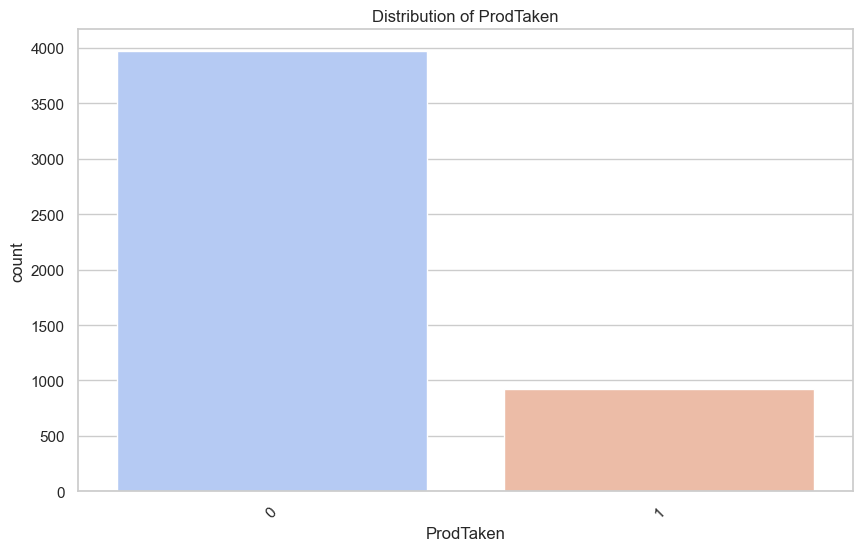

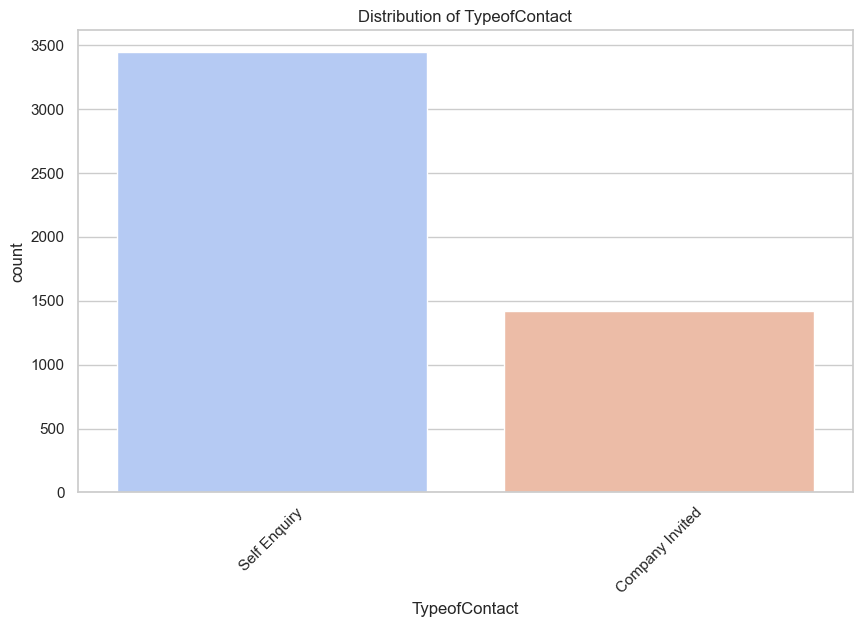

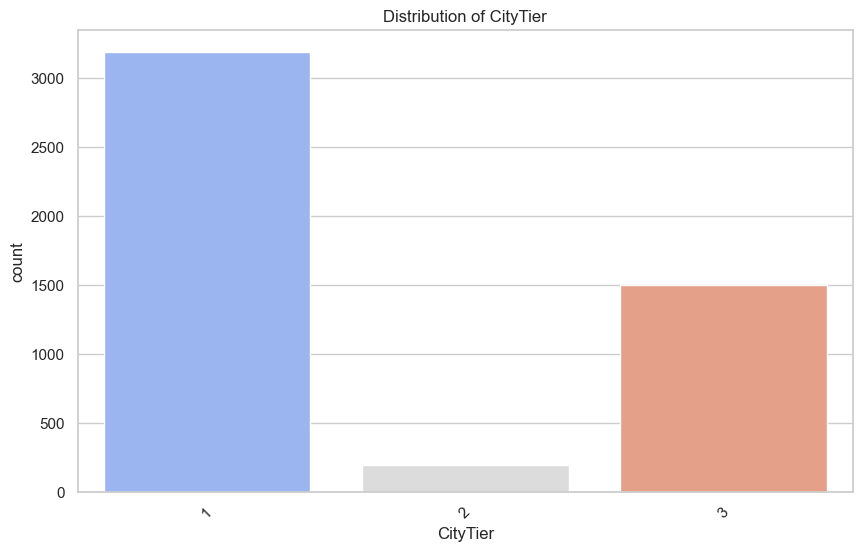

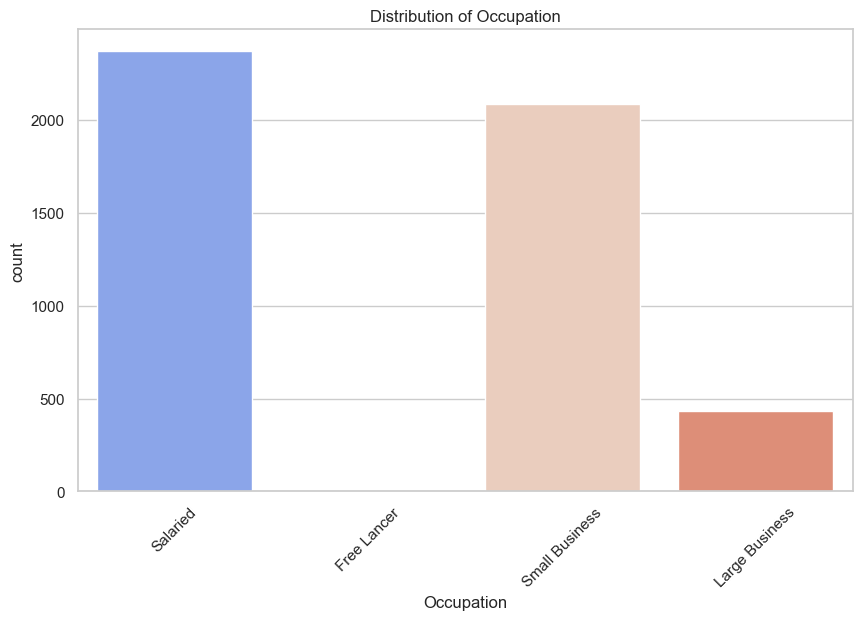

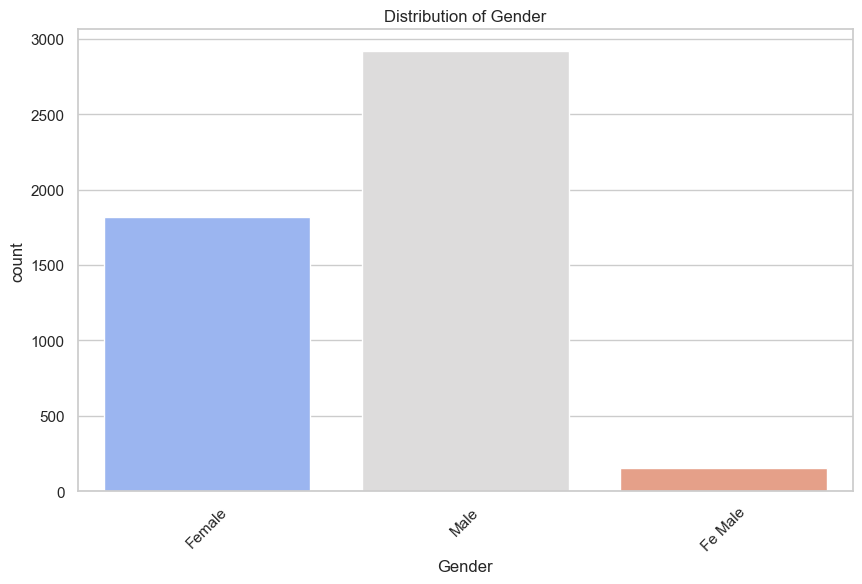

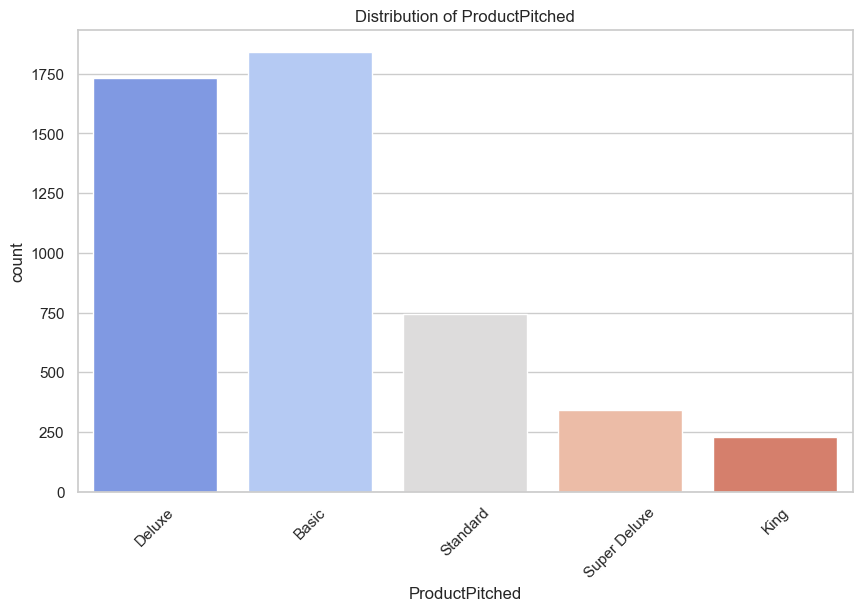

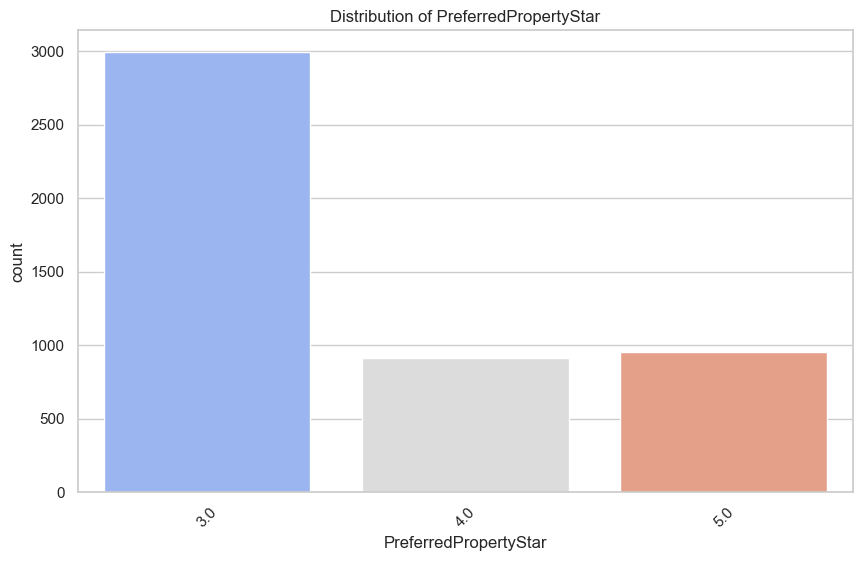

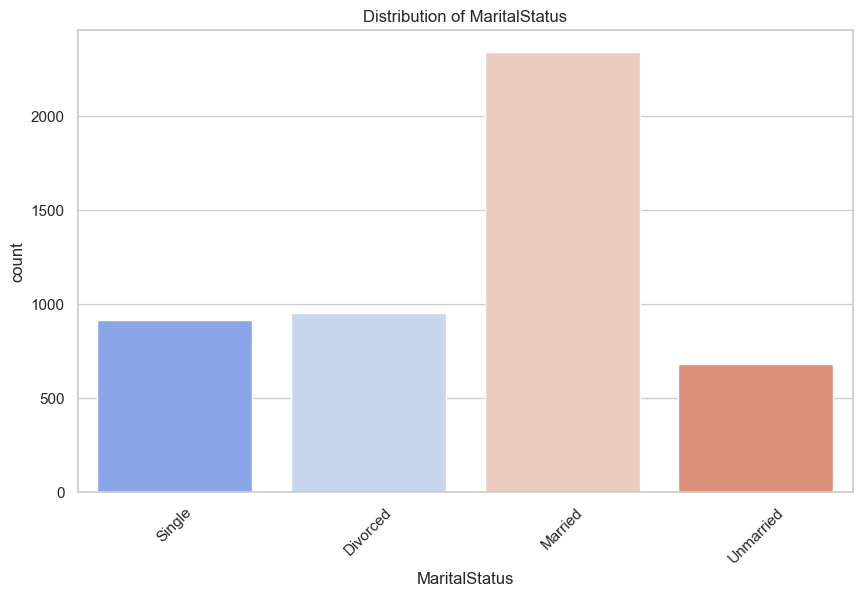

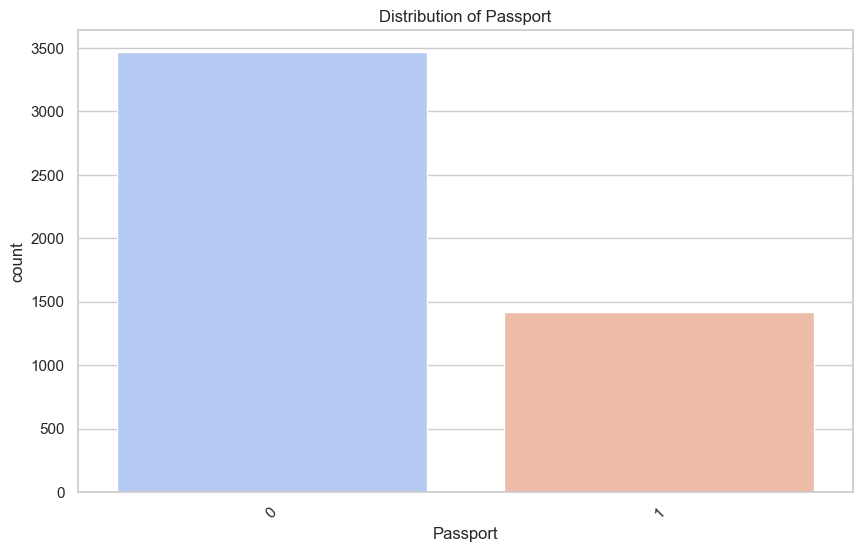

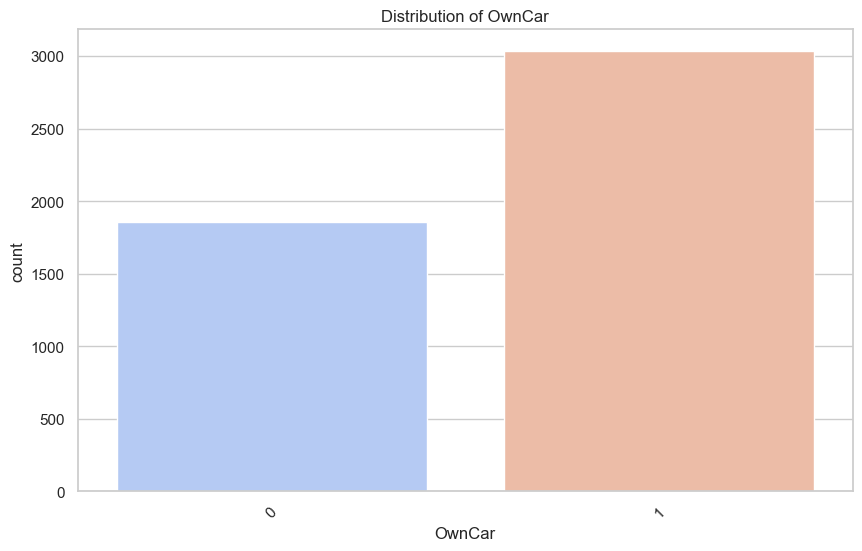

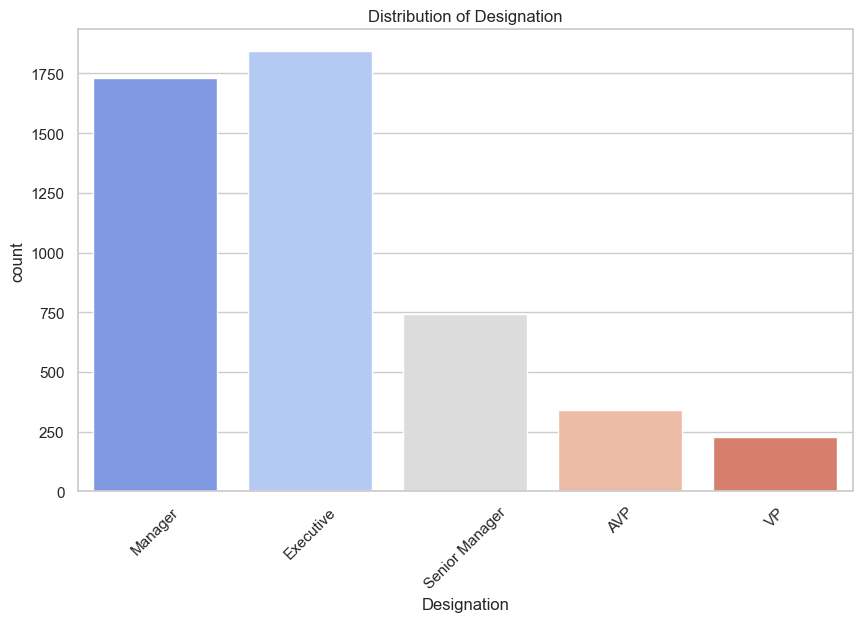

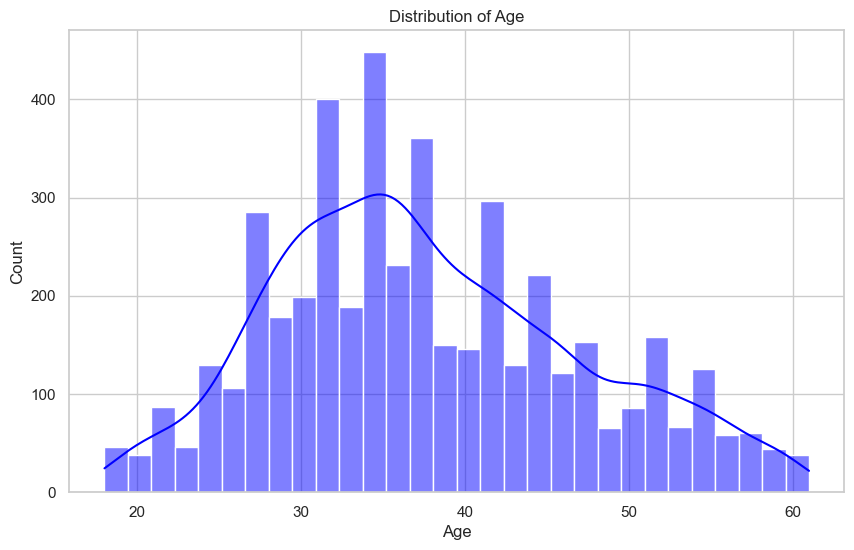

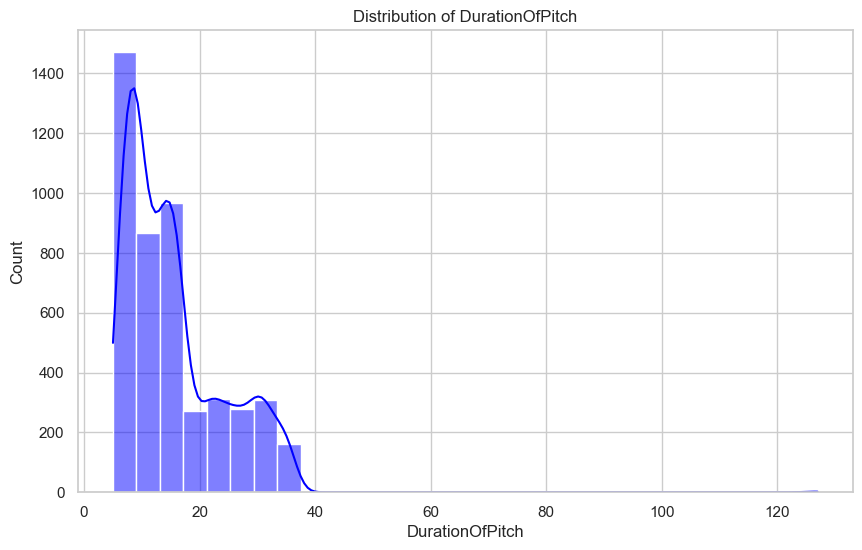

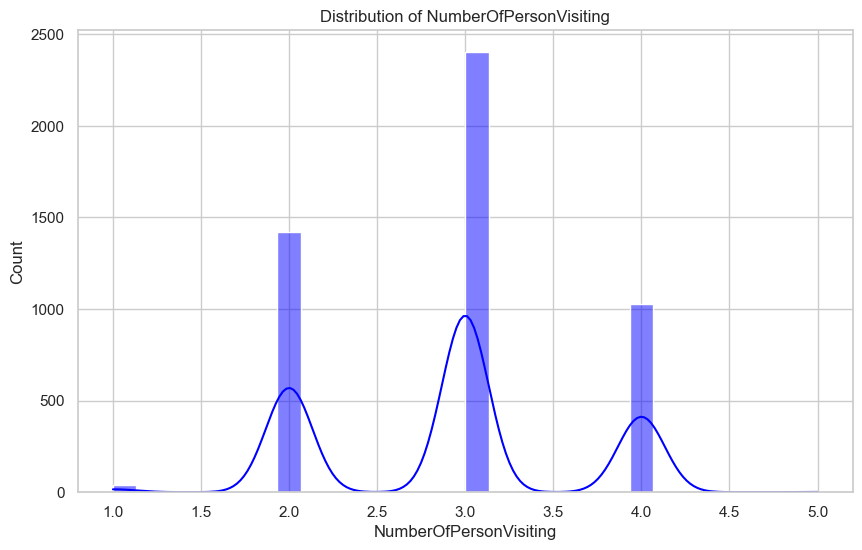

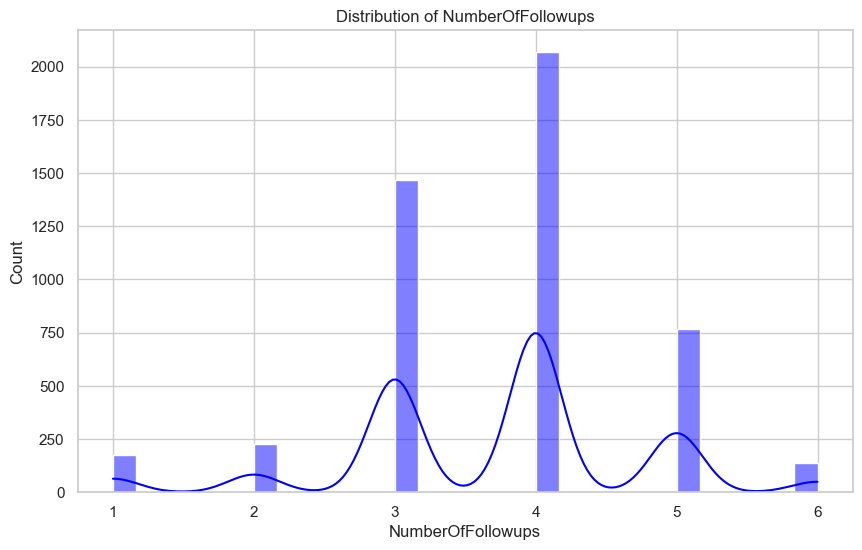

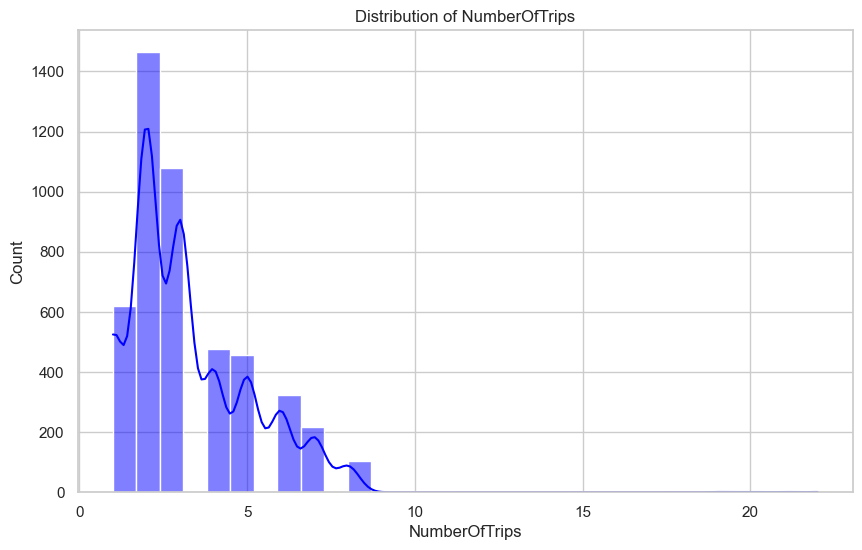

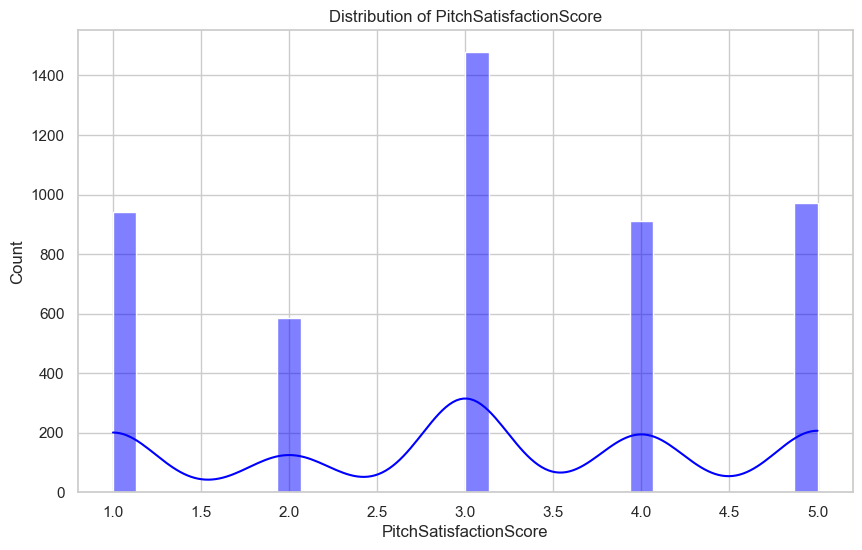

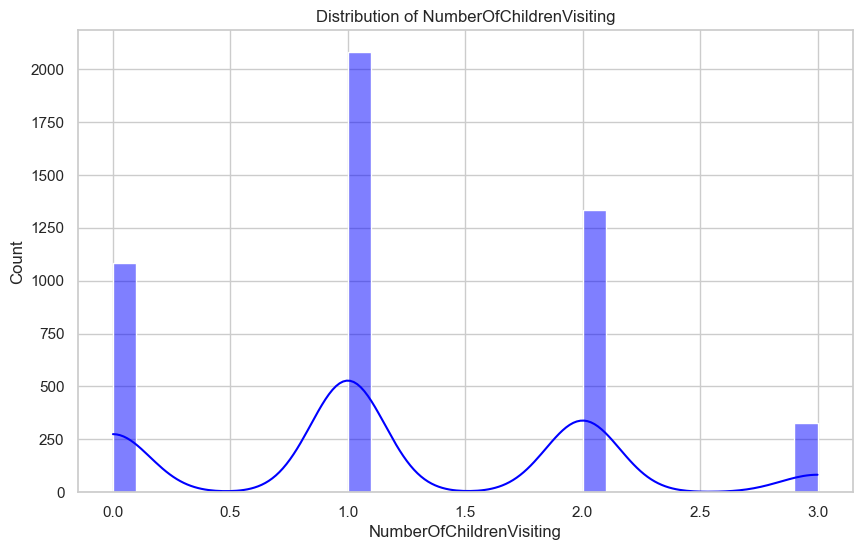

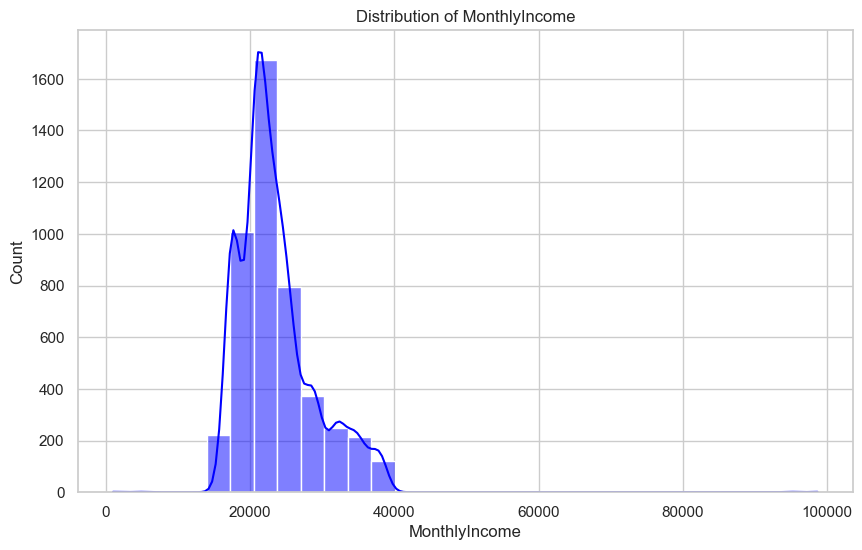

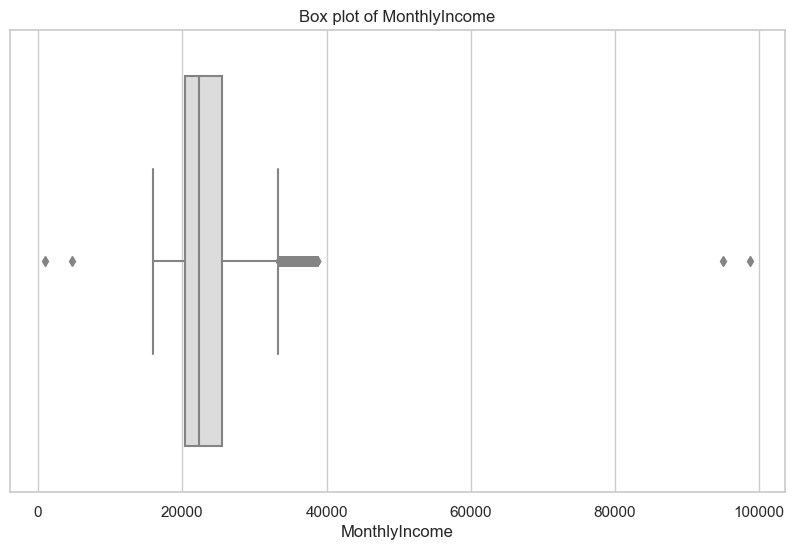

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Function to create bar plots for categorical variables
def plot_bar(column_name):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=column_name, palette='coolwarm')
    plt.title(f'Distribution of {column_name}')
    plt.xticks(rotation=45)
    plt.show()

# Function to create histograms for numerical variables
def plot_hist(column_name):
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=column_name, kde=True, color='blue', bins=30)
    plt.title(f'Distribution of {column_name}')
    plt.show()

# Function to create box plots for numerical variables
def plot_box(column_name):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=column_name, palette='coolwarm')
    plt.title(f'Box plot of {column_name}')
    plt.show()

# Plotting the columns as per your requirements
# Bar plots for categorical variables
plot_bar('ProdTaken')
plot_bar('TypeofContact')
plot_bar('CityTier')
plot_bar('Occupation')
plot_bar('Gender')
plot_bar('ProductPitched')
plot_bar('PreferredPropertyStar')
plot_bar('MaritalStatus')
plot_bar('Passport')
plot_bar('OwnCar')
plot_bar('Designation')

# Histograms for numerical variables
plot_hist('Age')
plot_hist('DurationOfPitch')
plot_hist('NumberOfPersonVisiting')
plot_hist('NumberOfFollowups')
plot_hist('NumberOfTrips')
plot_hist('PitchSatisfactionScore')
plot_hist('NumberOfChildrenVisiting')
plot_hist('MonthlyIncome')

# Box plot for MonthlyIncome to see the distribution with outliers
plot_box('MonthlyIncome')


In [16]:
import random
import plotly.express as px
import plotly.graph_objs as go
# Select only numerical columns for correlation matrix
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df[numerical_cols].corr()


# Count the occurrences of each ProdTaken value
prod_taken_counts = df['ProdTaken'].value_counts().reset_index()
prod_taken_counts.columns = ['ProdTaken', 'Count']

# Create a bar plot for ProdTaken distribution
fig1 = px.bar(prod_taken_counts, x='ProdTaken', y='Count', title='Distribution of ProdTaken')
fig1.show()

import plotly.figure_factory as ff


# KDE plot for Age distribution, excluding NaN values
fig2 = ff.create_distplot([df['Age'].dropna()], ['Age'], show_hist=False, colors=['blue'])
fig2.update_layout(title='Age Distribution (KDE)')
fig2.show()

# Histogram for Monthly Income distribution
fig3 = px.histogram(df, x='MonthlyIncome', nbins=20, title='Monthly Income Distribution', marginal='box')
fig3.show()

# Count the occurrences of each CityTier
city_tier_counts = df['CityTier'].value_counts().reset_index()
city_tier_counts.columns = ['CityTier', 'Count']

# Count the occurrences of each CityTier value
city_tier_counts = df['CityTier'].value_counts().reset_index()
city_tier_counts.columns = ['CityTier', 'Count']

# Create a bar plot for CityTier distribution with specified colors
fig4 = px.bar(city_tier_counts, x='CityTier', y='Count', title='City Tier Distribution',
              color='CityTier', color_discrete_map={1: 'blue', 2: 'green', 3: 'red'})

fig4.update_layout(xaxis=dict(tickmode='linear'))
fig4.show()
# Pie chart for Gender distribution
fig5 = px.pie(df, names='Gender', title='Gender Distribution', hole=0.3)
fig5.show()

# Count the occurrences of each Occupation value
occupation_counts = df['Occupation'].value_counts().reset_index()
occupation_counts.columns = ['Occupation', 'Count']

# Create a bar plot for Occupation distribution with specified color
fig6 = px.bar(occupation_counts, x='Occupation', y='Count', title='Occupation Distribution',
              color='Occupation', color_discrete_sequence=px.colors.qualitative.Vivid)

fig6.update_layout(showlegend=False)  # Hide the legend if you only want a single color
fig6.show()

# Scatter plot for Age vs Monthly Income
fig7 = px.scatter(df, x='Age', y='MonthlyIncome', color='ProdTaken', title='Age vs Monthly Income')
fig7.show()

# Heatmap of correlations between numerical features
fig8 = go.Figure(data=go.Heatmap(
    z=corr_matrix.values,
    x=corr_matrix.columns,
    y=corr_matrix.columns,
    colorscale='Magma'
))
fig8.update_layout(title='Correlation Heatmap')
fig8.show()

# Violin plot for Age distribution by ProdTaken
fig9 = px.violin(df, y='Age', color='ProdTaken', box=True, points="all", title='Age Distribution by ProdTaken')
fig9.show()

# Box plot for Monthly Income by Gender
fig10 = px.box(df, x='Gender', y='MonthlyIncome', color='Gender', title='Monthly Income by Gender')
fig10.show()

product_names = df['ProductPitched'].tolist()

# Count the occurrences of each product
product_counts = {product: product_names.count(product) for product in set(product_names)}

# Generate a list of unique colors
unique_colors = []
for _ in range(len(product_counts)):
    unique_colors.append('#{:06x}'.format(random.randint(0, 256**3-1)))

# Create a bar plot
fig11 = go.Figure(go.Bar(
            x=list(product_counts.keys()),
            y=list(product_counts.values()),
            marker_color=unique_colors  # Assign unique colors to each product
))

# Customize the layout
fig11.update_layout(
    title="Product Distribution",
    xaxis_title="Product Names",
    yaxis_title="Frequency"
)

# Show the plot
fig11.show()


## Phase - III- Data Preparation & Data Preprocessing

**3.1 Handle missing values**


In [17]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Assuming df, num_cols, cat_cols, and imputer are already defined
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns
imputer = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), num_cols),
        ('cat', SimpleImputer(strategy='most_frequent'), cat_cols)
    ]
)

imputed_data = imputer.fit_transform(df)

# Convert imputed_data to DataFrame
df_imputed = pd.DataFrame(imputed_data, columns=num_cols.tolist() + cat_cols.tolist())

# Check for missing values
print("After handling missing values:\n",df_imputed.isnull().sum())


After handling missing values:
 CustomerID                  0
ProdTaken                   0
Age                         0
CityTier                    0
DurationOfPitch             0
NumberOfPersonVisiting      0
NumberOfFollowups           0
PreferredPropertyStar       0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
MonthlyIncome               0
TypeofContact               0
Occupation                  0
Gender                      0
ProductPitched              0
MaritalStatus               0
Designation                 0
dtype: int64


In [18]:
# Replace 'Fe Male' with 'Female'
df['Gender'] = df['Gender'].replace('Fe Male', 'Female')

**3.2 Data Transformation**

In [19]:
from sklearn.preprocessing import LabelEncoder

# Select categorical columns
cat_cols = ['TypeofContact','ProdTaken','Occupation', 'Gender', 'MaritalStatus', 'Designation']

# Initialize LabelEncoder
encoder = LabelEncoder()

# Encode categorical columns
for col in cat_cols:
    df_imputed[col] = encoder.fit_transform(df_imputed[col])

# Encode categorical columns and print value counts
for col in cat_cols:
    df_imputed[col] = encoder.fit_transform(df_imputed[col])
    print(f"Value counts for {col}:")
    print(df_imputed[col].value_counts())
    print("\n")



Value counts for TypeofContact:
TypeofContact
1    3469
0    1419
Name: count, dtype: int64


Value counts for ProdTaken:
ProdTaken
0    3968
1     920
Name: count, dtype: int64


Value counts for Occupation:
Occupation
2    2368
3    2084
1     434
0       2
Name: count, dtype: int64


Value counts for Gender:
Gender
2    2916
1    1817
0     155
Name: count, dtype: int64


Value counts for MaritalStatus:
MaritalStatus
1    2340
0     950
2     916
3     682
Name: count, dtype: int64


Value counts for Designation:
Designation
1    1842
2    1732
3     742
0     342
4     230
Name: count, dtype: int64




In [20]:
# Separate the dataset into two subsets based on 'ProdTaken' values
prod_taken_0 = df_imputed[df_imputed['ProdTaken'] == 0]
prod_taken_1 = df_imputed[df_imputed['ProdTaken'] == 1]
# Save prod_taken_1_copy as another CSV file
prod_taken_1.to_csv('prod1.csv', index=False)
prod_taken_0.to_csv('prod0.csv', index=False)



In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
df1 = pd.read_csv('prod1.csv')

# Define features (X) and target variable (y)
features_1 = df1.drop('ProductPitched', axis=1).columns.tolist()  # Drop the target variable and extract column names as a list
target_variable_1 = 'ProductPitched'

# Extract features (X) and target variable (y)
x = df1[features_1]
y = df1[target_variable_1]

# Display the first few rows of X and y
print("Feature Matrix (X):")
print(x.head())
print("\nTarget Variable (y):")
print(y.head())

Feature Matrix (X):
   CustomerID  ProdTaken        Age  CityTier  DurationOfPitch  \
0    200000.0          1  41.000000       3.0              6.0   
1    200002.0          1  37.000000       1.0              8.0   
2    200014.0          1  28.000000       1.0             30.0   
3    200021.0          1  37.622265       3.0             15.0   
4    200024.0          1  34.000000       1.0             12.0   

   NumberOfPersonVisiting  NumberOfFollowups  PreferredPropertyStar  \
0                     3.0                3.0                    3.0   
1                     3.0                4.0                    3.0   
2                     2.0                4.0                    3.0   
3                     2.0                4.0                    5.0   
4                     2.0                3.0                    5.0   

   NumberOfTrips  Passport  PitchSatisfactionScore  OwnCar  \
0            1.0       1.0                     2.0     1.0   
1            7.0       1.0      

In [22]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Assuming X and y are already defined and contain categorical features and target variable respectively

# Initialize SelectKBest with chi2 scoring function
selector = SelectKBest(score_func=chi2, k=10)  # Select top 5 features, adjust k as needed

# Fit selector to data
selector.fit(x, y)

# Get selected feature indices
selected_feature_indices = selector.get_support(indices=True)

# Get selected feature names
selected_features = x.columns[selected_feature_indices]

# Display selected features
print("Selected Features:")
print(selected_features)


Selected Features:
Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TypeofContact',
       'Designation'],
      dtype='object')


In [23]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(x, y)

# Get feature importances
importances = clf.feature_importances_
feature_names = x.columns

# Create a DataFrame for visualization
feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Select top 10 features
selection_features = feature_importances.head(10)['Feature'].values

# Print top features
print("Top 10 features:", selection_features)


Top 10 features: ['Designation' 'MonthlyIncome' 'Age' 'CityTier' 'DurationOfPitch'
 'CustomerID' 'NumberOfTrips' 'PitchSatisfactionScore' 'MaritalStatus'
 'NumberOfFollowups']


In [24]:
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd
from sklearn.model_selection import train_test_split

# Initialize SelectKBest with ANOVA as the scoring function
selector = SelectKBest(score_func=f_classif, k=10)  # Select top 5 features, adjust k as needed

# Fit selector to training data
selector.fit(x, y)

# Get selected feature indices
selectedfeature_indices = selector.get_support(indices=True)

# Get selected feature names
selectedfeatures = x.columns[selectedfeature_indices]

# Print selected feature names
print("Selected Features:")
for feature in selectedfeatures:
    print(feature)


Selected Features:
Age
CityTier
DurationOfPitch
NumberOfFollowups
Passport
OwnCar
MonthlyIncome
TypeofContact
Occupation
Designation


In [25]:
# Assuming 'selected_features_chi2', 'top_features', and 'selected_features_anova' contain the selected features from different methods

# Convert the selected features to sets
selected_features_chi2_set = set(selected_features)
top_features_set = set(selection_features)
selected_features_anova_set = set(selectedfeatures)

# Find the intersection of the selected features
intersection_features = selected_features_chi2_set.intersection(top_features_set, selected_features_anova_set)

# Convert the intersection features back to a list
x_selected = list(intersection_features)

# Print the consolidated feature set
print("Intersected Features:")
for feature in x_selected:
    print(feature)
x = df1[x_selected]

Intersected Features:
CityTier
DurationOfPitch
Designation
Age
MonthlyIncome


**3.4 Data splitting**

In [26]:

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

# Display the shape of the resulting datasets
print("\nTraining feature set shape:", X_train.shape)
print("Validation feature set shape:", X_val.shape)
print("Training target set shape:", y_train.shape)
print("Validation target set shape:", y_val.shape)


Training feature set shape: (736, 5)
Validation feature set shape: (184, 5)
Training target set shape: (736,)
Validation target set shape: (184,)


In [27]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and validation data
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Display the shape of the scaled datasets
print("\nScaled Training feature set shape:", X_train_scaled.shape)
print("Scaled Validation feature set shape:", X_val_scaled.shape)



Scaled Training feature set shape: (736, 5)
Scaled Validation feature set shape: (184, 5)


In [28]:
# Check the distribution of the target variable in the training and validation sets
print("Training set class distribution:")
print(y_train.value_counts())

print("\nValidation set class distribution:")
print(y_val.value_counts())


Training set class distribution:
ProductPitched
Basic           449
Deluxe          162
Standard         93
Super Deluxe     17
King             15
Name: count, dtype: int64

Validation set class distribution:
ProductPitched
Basic           103
Deluxe           42
Standard         31
King              5
Super Deluxe      3
Name: count, dtype: int64


In [29]:
# Display the first few rows of the scaled datasets
print("\nFirst few rows of Scaled Training feature set:")
print(X_train_scaled[:5])

print("\nFirst few rows of Scaled Validation feature set:")
print(X_val_scaled[:5])



First few rows of Scaled Training feature set:
[[-0.86142233 -0.0449863  -0.62362525 -0.89512376 -0.30864104]
 [ 1.22070192 -0.0449863   1.81780126  1.60614113  1.2990288 ]
 [-0.86142233 -0.92399945 -0.62362525  2.4065459  -0.24667331]
 [-0.86142233 -0.17055961 -0.62362525  0.26769079  0.31231347]
 [-0.86142233  1.08517346 -0.62362525  0.70568577 -0.96650269]]

First few rows of Scaled Validation feature set:
[[ 1.22070192 -0.29613292  0.597088    1.50609053 -0.08564449]
 [-0.86142233  0.58288023 -0.62362525 -0.39487078 -0.99901393]
 [ 1.22070192  2.08975991  0.597088    1.10588815  0.16920871]
 [-0.86142233 -0.79842614 -0.62362525 -0.49492138 -1.0699277 ]
 [ 1.22070192 -0.54727953 -0.62362525 -1.59547793 -0.35620782]]


In [30]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd

# Define the models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'GBM': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'kNN': KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
}

# Train and evaluate each model
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_scaled, y_train)
    print("Training complete.")

    # Make predictions
    y_pred_train = model.predict(X_train_scaled)
    y_pred_val = model.predict(X_val_scaled)

    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, y_pred_train)
    val_accuracy = accuracy_score(y_val, y_pred_val)

    # Print results
    print(f"\n{name}:")
    print(f"Training Accuracy: {train_accuracy:.2f}")
    print(f"Validation Accuracy: {val_accuracy:.2f}")
    print("Classification Report on Validation Data:")
    print(classification_report(y_val, y_pred_val))

    # Print actual vs predicted
    print("Actual vs Predicted:")
    if isinstance(y_val, pd.Series):
        for i in range(len(y_val)):
            print(f"Actual: {y_val.iloc[i]}, Predicted: {y_pred_val[i]}")
    elif isinstance(y_val, np.ndarray):
        for i in range(len(y_val)):
            print(f"Actual: {y_val[i]}, Predicted: {y_pred_val[i]}")

    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    print(f"Cross-Validation Accuracy (5-fold): {cv_scores.mean():.2f} (+/- {cv_scores.std() * 2:.2f})\n")


Training Random Forest...
Training complete.

Random Forest:
Training Accuracy: 1.00
Validation Accuracy: 1.00
Classification Report on Validation Data:
              precision    recall  f1-score   support

       Basic       1.00      1.00      1.00       103
      Deluxe       1.00      1.00      1.00        42
        King       1.00      1.00      1.00         5
    Standard       1.00      1.00      1.00        31
Super Deluxe       1.00      1.00      1.00         3

    accuracy                           1.00       184
   macro avg       1.00      1.00      1.00       184
weighted avg       1.00      1.00      1.00       184

Actual vs Predicted:
Actual: Deluxe, Predicted: Deluxe
Actual: Basic, Predicted: Basic
Actual: Deluxe, Predicted: Deluxe
Actual: Basic, Predicted: Basic
Actual: Basic, Predicted: Basic
Actual: Basic, Predicted: Basic
Actual: Basic, Predicted: Basic
Actual: Basic, Predicted: Basic
Actual: Basic, Predicted: Basic
Actual: Deluxe, Predicted: Deluxe
Actual: Del

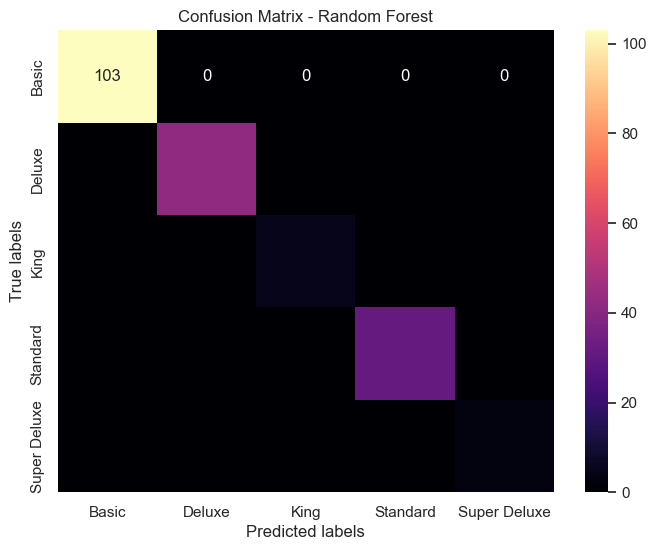

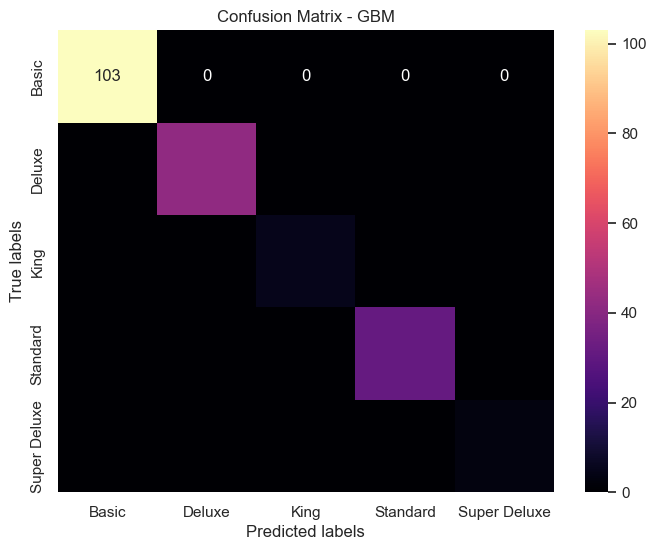

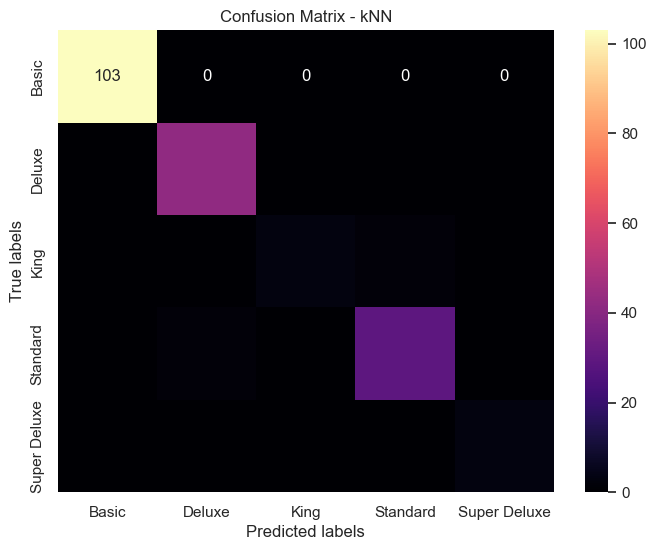

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Get unique classes in target variable
labels = np.unique(y_val)

# Define a function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='magma', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(title)
    plt.show()

# Iterate over models and plot confusion matrix for each
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred_val = model.predict(X_val_scaled)
    plot_confusion_matrix(y_val, y_pred_val, f'Confusion Matrix - {name}')


In [32]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform grid search
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Score: 0.9972881044309616


In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize Random Forest classifier with the best parameters
best_params = {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
best_rf_classifier = RandomForestClassifier(**best_params, random_state=42)

# Train the tuned model on the training data
best_rf_classifier.fit(X_train_scaled, y_train)

# Make predictions on the training data
y_pred_train = best_rf_classifier.predict(X_train_scaled)

# Make predictions on the validation data
y_pred_val = best_rf_classifier.predict(X_val_scaled)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
val_accuracy = accuracy_score(y_val, y_pred_val)

# Print the training accuracy
print("Training Accuracy:", train_accuracy)

# Print the validation accuracy and classification report
print("\nValidation Accuracy:", val_accuracy)
print("\nClassification Report on Validation Data:")
print(classification_report(y_val, y_pred_val))


Training Accuracy: 1.0

Validation Accuracy: 1.0

Classification Report on Validation Data:
              precision    recall  f1-score   support

       Basic       1.00      1.00      1.00       103
      Deluxe       1.00      1.00      1.00        42
        King       1.00      1.00      1.00         5
    Standard       1.00      1.00      1.00        31
Super Deluxe       1.00      1.00      1.00         3

    accuracy                           1.00       184
   macro avg       1.00      1.00      1.00       184
weighted avg       1.00      1.00      1.00       184



**GBM**

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Gradient Boosting classifier
gbm_classifier = GradientBoostingClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=gbm_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform grid search
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and best score
best_params_gbm = grid_search.best_params_
best_score_gbm = grid_search.best_score_

print("Best Parameters for GBM:", best_params_gbm)
print("Best Score for GBM:", best_score_gbm)


Best Parameters for GBM: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Score for GBM: 1.0


In [35]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize Gradient Boosting classifier with the best parameters

best_gbm_classifier = GradientBoostingClassifier(**best_params_gbm, random_state=42)

# Train the tuned model on the training data
best_gbm_classifier.fit(X_train_scaled, y_train)

# Make predictions on the training and testing data
y_pred_train_gbm = best_gbm_classifier.predict(X_train_scaled)
y_pred_test_gbm = best_gbm_classifier.predict(X_val_scaled)

# Calculate accuracy
train_accuracy_gbm = accuracy_score(y_train, y_pred_train_gbm)
test_accuracy_gbm = accuracy_score(y_val, y_pred_test_gbm)

# Print the training and testing accuracy
print("Training Accuracy for GBM:", train_accuracy_gbm)
print("Testing Accuracy for GBM:", test_accuracy_gbm)
print("\nClassification Report on Testing Data for GBM:")
print(classification_report(y_val, y_pred_test_gbm))


Training Accuracy for GBM: 1.0
Testing Accuracy for GBM: 1.0

Classification Report on Testing Data for GBM:
              precision    recall  f1-score   support

       Basic       1.00      1.00      1.00       103
      Deluxe       1.00      1.00      1.00        42
        King       1.00      1.00      1.00         5
    Standard       1.00      1.00      1.00        31
Super Deluxe       1.00      1.00      1.00         3

    accuracy                           1.00       184
   macro avg       1.00      1.00      1.00       184
weighted avg       1.00      1.00      1.00       184



**KNN**

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 10, 15],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

# Initialize kNN classifier
knn_classifier = KNeighborsClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=knn_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform grid search
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and best score
best_params_knn = grid_search.best_params_
best_score_knn = grid_search.best_score_

print("Best Parameters for kNN:", best_params_knn)
print("Best Score for kNN:", best_score_knn)


Best Parameters for kNN: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Best Score for kNN: 0.9932340503769076


In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

best_knn_classifier = KNeighborsClassifier(**best_params_knn)

# Train the tuned model on the training data
best_knn_classifier.fit(X_train_scaled, y_train)

# Make predictions on the training and testing data
y_pred_train_knn = best_knn_classifier.predict(X_train_scaled)
y_pred_test_knn = best_knn_classifier.predict(X_val_scaled)

# Calculate accuracy
train_accuracy_knn = accuracy_score(y_train, y_pred_train_knn)
vali_accuracy_knn = accuracy_score(y_val, y_pred_test_knn)

# Print the training and testing accuracy
print("Training Accuracy for kNN:", train_accuracy_knn)
print("Validation Accuracy for kNN:", vali_accuracy_knn)
print("\nClassification Report on Testing Data for kNN:")
print(classification_report(y_val, y_pred_test_knn))


Training Accuracy for kNN: 1.0
Validation Accuracy for kNN: 0.9945652173913043

Classification Report on Testing Data for kNN:
              precision    recall  f1-score   support

       Basic       1.00      1.00      1.00       103
      Deluxe       0.98      1.00      0.99        42
        King       1.00      1.00      1.00         5
    Standard       1.00      0.97      0.98        31
Super Deluxe       1.00      1.00      1.00         3

    accuracy                           0.99       184
   macro avg       1.00      0.99      0.99       184
weighted avg       0.99      0.99      0.99       184



In [38]:
# Dictionary to store testing accuracies of models before tuning
testing_accuracies_before_tuning = {}

# Evaluate each model before tuning on the testing data
for name, model in models.items():
    # Train the model without tuning
    model.fit(X_train_scaled, y_train)

    # Make predictions on the testing data
    y_pred_test = model.predict(X_val_scaled)

    # Calculate accuracy
    test_accuracy = accuracy_score(y_val, y_pred_test)

    # Store the testing accuracy in the dictionary
    testing_accuracies_before_tuning[name] = test_accuracy

# Dictionary to store testing accuracies of models after tuning
testing_accuracies_after_tuning = {}

# Evaluate each model after tuning on the testing data
for name, model in models.items():
    # Train the model after tuning
    if name == 'Random Forest':
        # Train the tuned Random Forest model
        best_rf_classifier.fit(X_train_scaled, y_train)
        # Make predictions on the testing data
        y_pred_test = best_rf_classifier.predict(X_val_scaled)
    elif name == 'GBM':
        # Train the tuned GBM model
        best_gbm_classifier.fit(X_train_scaled, y_train)
        # Make predictions on the testing data
        y_pred_test = best_gbm_classifier.predict(X_val_scaled)
    elif name == 'kNN':
        # Train the tuned kNN model
        best_knn_classifier.fit(X_train_scaled, y_train)
        # Make predictions on the testing data
        y_pred_test = best_knn_classifier.predict(X_val_scaled)

    # Calculate accuracy
    test_accuracy = accuracy_score(y_val, y_pred_test)

    # Store the testing accuracy in the dictionary
    testing_accuracies_after_tuning[name] = test_accuracy

# Find the best model before tuning based on testing accuracy
best_model_before_tuning = max(testing_accuracies_before_tuning, key=testing_accuracies_before_tuning.get)
best_accuracy_before_tuning = testing_accuracies_before_tuning[best_model_before_tuning]

# Find the best model after tuning based on testing accuracy
best_model_after_tuning = max(testing_accuracies_after_tuning, key=testing_accuracies_after_tuning.get)
best_accuracy_after_tuning = testing_accuracies_after_tuning[best_model_after_tuning]

print("Before Tuning:")
print(f"The best model based on testing accuracy is {best_model_before_tuning} with an accuracy of {best_accuracy_before_tuning:.2f}.")

print("\nAfter Tuning:")
print(f"The best model based on testing accuracy is {best_model_after_tuning} with an accuracy of {best_accuracy_after_tuning:.2f}.")


Before Tuning:
The best model based on testing accuracy is Random Forest with an accuracy of 1.00.

After Tuning:
The best model based on testing accuracy is Random Forest with an accuracy of 1.00.


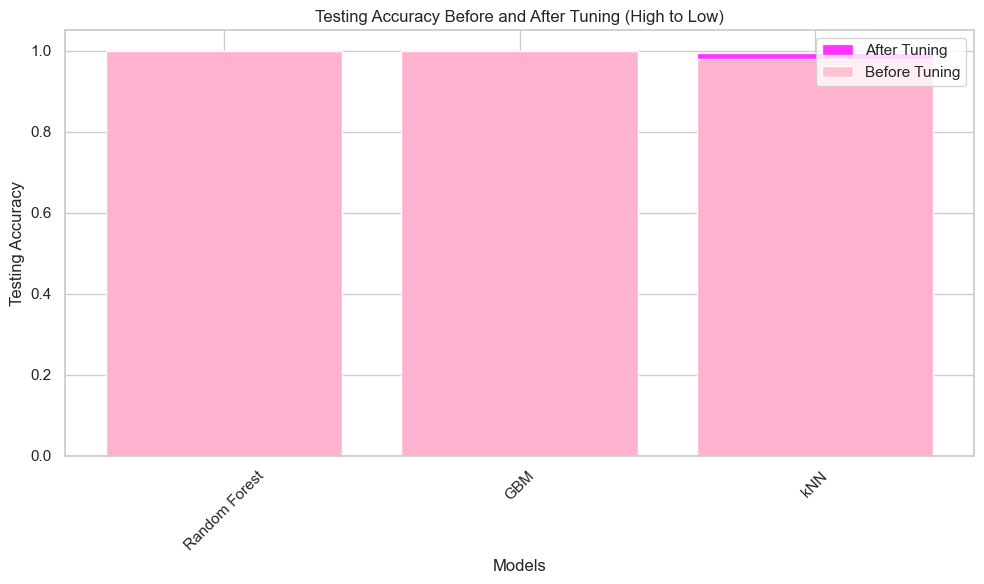

In [39]:
import matplotlib.pyplot as plt

# Names of models
models_names = list(models.keys())

# Testing accuracies before tuning
accuracies_before_tuning = list(testing_accuracies_before_tuning.values())

# Sort models based on testing accuracy after tuning
sorted_models_after_tuning = sorted(testing_accuracies_after_tuning.items(), key=lambda x: x[1], reverse=True)
models_names_after_tuning, accuracies_after_tuning = zip(*sorted_models_after_tuning)

plt.figure(figsize=(10, 6))
plt.bar(models_names_after_tuning, accuracies_after_tuning, color='magenta', alpha=0.8, label='After Tuning')
plt.bar(models_names, accuracies_before_tuning, color='pink', alpha=0.9, label='Before Tuning')
# Plotting
plt.xlabel('Models')
plt.ylabel('Testing Accuracy')
plt.title('Testing Accuracy Before and After Tuning (High to Low)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [40]:
df2=pd.read_csv('prod0.csv')
df2

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome,TypeofContact,Occupation,Gender,ProductPitched,MaritalStatus,Designation
0,200001.0,0,49.000000,1.0,14.0,3.0,4.0,4.000000,2.000000,0.0,3.0,1.0,2.0,20130.0,0,2,2,Deluxe,0,2
1,200003.0,0,33.000000,1.0,9.0,2.0,3.0,3.000000,2.000000,1.0,5.0,1.0,1.0,17909.0,0,2,1,Basic,0,1
2,200004.0,0,37.622265,1.0,8.0,2.0,3.0,4.000000,1.000000,0.0,5.0,1.0,0.0,18468.0,1,3,2,Basic,0,1
3,200005.0,0,32.000000,1.0,8.0,3.0,3.0,3.000000,1.000000,0.0,5.0,1.0,1.0,18068.0,0,2,2,Basic,2,1
4,200006.0,0,59.000000,1.0,9.0,2.0,2.0,5.000000,5.000000,1.0,2.0,1.0,1.0,17670.0,1,3,1,Basic,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3963,204810.0,0,32.000000,1.0,31.0,4.0,5.0,5.000000,3.000000,0.0,5.0,1.0,1.0,25490.0,1,3,0,Deluxe,3,2
3964,204811.0,0,60.000000,3.0,10.0,3.0,5.0,3.000000,7.000000,0.0,3.0,0.0,1.0,23849.0,1,2,0,Deluxe,3,2
3965,204812.0,0,44.000000,1.0,10.0,4.0,6.0,3.581037,5.000000,0.0,5.0,1.0,1.0,38418.0,1,2,2,King,1,4
3966,204813.0,0,50.000000,1.0,11.0,3.0,5.0,3.000000,3.236521,0.0,3.0,0.0,2.0,37389.0,1,3,2,King,1,4


In [41]:
df2=pd.read_csv('prod0.csv')
df2


,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome,TypeofContact,Occupation,Gender,ProductPitched,MaritalStatus,Designation
0,200001.0,0,49.000000,1.0,14.0,3.0,4.0,4.000000,2.000000,0.0,3.0,1.0,2.0,20130.0,0,2,2,Deluxe,0,2
1,200003.0,0,33.000000,1.0,9.0,2.0,3.0,3.000000,2.000000,1.0,5.0,1.0,1.0,17909.0,0,2,1,Basic,0,1
2,200004.0,0,37.622265,1.0,8.0,2.0,3.0,4.000000,1.000000,0.0,5.0,1.0,0.0,18468.0,1,3,2,Basic,0,1
3,200005.0,0,32.000000,1.0,8.0,3.0,3.0,3.000000,1.000000,0.0,5.0,1.0,1.0,18068.0,0,2,2,Basic,2,1
4,200006.0,0,59.000000,1.0,9.0,2.0,2.0,5.000000,5.000000,1.0,2.0,1.0,1.0,17670.0,1,3,1,Basic,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3963,204810.0,0,32.000000,1.0,31.0,4.0,5.0,5.000000,3.000000,0.0,5.0,1.0,1.0,25490.0,1,3,0,Deluxe,3,2
3964,204811.0,0,60.000000,3.0,10.0,3.0,5.0,3.000000,7.000000,0.0,3.0,0.0,1.0,23849.0,1,2,0,Deluxe,3,2
3965,204812.0,0,44.000000,1.0,10.0,4.0,6.0,3.581037,5.000000,0.0,5.0,1.0,1.0,38418.0,1,2,2,King,1,4
3966,204813.0,0,50.000000,1.0,11.0,3.0,5.0,3.000000,3.236521,0.0,3.0,0.0,2.0,37389.0,1,3,2,King,1,4


In [42]:
x2 = df2[x_selected]
y2 = df2['ProductPitched']

print(x2.shape)
print(y2.shape)

(3968, 5)
(3968,)


In [43]:
# Assuming X_test is your test feature set and y_test is your test target set
# If not, replace X_test and y_test with your actual test data

# Predict the probability of each class for each sample in the test data
predicted_probabilities_test = best_rf_classifier.predict_proba(x2)

# Print the predicted probabilities for the test data
print("Predicted Probabilities for Test Data:")
print(predicted_probabilities_test)


Predicted Probabilities for Test Data:
[[0.01 0.12 0.08 0.78 0.01]
 [0.05 0.76 0.03 0.1  0.06]
 [0.05 0.76 0.03 0.1  0.06]
 ...
 [0.   0.1  0.52 0.37 0.01]
 [0.   0.1  0.52 0.37 0.01]
 [0.05 0.76 0.03 0.1  0.06]]


In [44]:
# Find the index of the highest probability in each row
predicted_classes = predicted_probabilities_test.argmax(axis=1)

# Get the unique target values from y_test
target_names = y2.unique()

# Map the index to the corresponding target name
predicted_targets = [target_names[index] for index in predicted_classes]

# Print the predicted targets
print("Predicted Targets for Test Data:")
print(predicted_targets)


Predicted Targets for Test Data:
['Super Deluxe', 'Basic', 'Basic', 'Basic', 'Basic', 'Basic', 'Standard', 'Super Deluxe', 'Basic', 'Super Deluxe', 'Basic', 'Basic', 'Standard', 'Basic', 'Basic', 'Basic', 'Basic', 'Super Deluxe', 'Standard', 'Basic', 'Standard', 'Super Deluxe', 'Standard', 'Standard', 'Basic', 'Super Deluxe', 'Basic', 'Basic', 'Basic', 'Basic', 'Super Deluxe', 'Basic', 'Basic', 'Standard', 'Super Deluxe', 'Super Deluxe', 'Basic', 'Super Deluxe', 'Basic', 'Super Deluxe', 'Standard', 'Super Deluxe', 'Standard', 'Standard', 'Basic', 'Super Deluxe', 'Super Deluxe', 'Super Deluxe', 'Super Deluxe', 'Standard', 'Standard', 'Standard', 'Basic', 'Super Deluxe', 'Standard', 'Basic', 'Super Deluxe', 'Basic', 'Basic', 'Super Deluxe', 'Super Deluxe', 'Super Deluxe', 'Super Deluxe', 'Standard', 'Standard', 'Super Deluxe', 'Super Deluxe', 'Basic', 'Standard', 'Super Deluxe', 'Super Deluxe', 'Standard', 'Basic', 'Basic', 'Super Deluxe', 'Basic', 'Super Deluxe', 'Super Deluxe', 'Standa

In [45]:
import pandas as pd

# Combine customer IDs, predicted targets, and probability values into a DataFrame
results_df = pd.DataFrame({
    'CustomerID': df2['CustomerID'],
    'ProductTake':df2['ProdTaken'],  # Assuming 'CustomerID' is the column containing customer IDs
    'PredictedTarget': predicted_targets,
    'ProbabilityValue': predicted_probabilities_test.max(axis=1)  # Maximum probability value for each sample
})

# Print the combined DataFrame
print("Results:")
print(results_df)

# Store the combined DataFrame into a CSV file
results_df.to_csv('prediction_rf_cnf.csv', index=False)


Results:
      CustomerID  ProductTake PredictedTarget  ProbabilityValue
0       200001.0            0    Super Deluxe              0.78
1       200003.0            0           Basic              0.76
2       200004.0            0           Basic              0.76
3       200005.0            0           Basic              0.76
4       200006.0            0           Basic              0.76
...          ...          ...             ...               ...
3963    204810.0            0    Super Deluxe              0.78
3964    204811.0            0    Super Deluxe              0.78
3965    204812.0            0        Standard              0.52
3966    204813.0            0        Standard              0.52
3967    204814.0            0           Basic              0.76

[3968 rows x 4 columns]


In [50]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

# Select features for segmentation
features = list(selected_features)
from sklearn.impute import SimpleImputer

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df[features]), columns=features)

# Fit KMeans clustering
kmeans = KMeans(n_clusters=3)
df['Segment'] = kmeans.fit_predict(df_imputed)

# Encode categorical features
label_encoder = LabelEncoder()
for feature in cat_cols:
    df[feature] = label_encoder.fit_transform(df[feature])
# Drop rows with missing values
df_cleaned = df.dropna(subset=features)

# Fit KMeans clustering
kmeans = KMeans(n_clusters=3)
df_cleaned['Segment'] = kmeans.fit_predict(df_cleaned[features])


In [51]:
alternative_products = ['Standard', 'Super Deluxe', 'King','Deluxe','Basic']


In [52]:
from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import train_test_split

# Load data for recommendation system
reader = Reader(rating_scale=(0, 1))
data = Dataset.load_from_df(df[['CustomerID', 'ProductPitched', 'ProdTaken']], reader)

# Train-test split
trainset, testset = train_test_split(data, test_size=0.2)

# Use item-based collaborative filtering for recommendation
algo = KNNBasic(sim_options={'user_based': False})
algo.fit(trainset)


Computing the msd similarity matrix...
Done computing similarity matrix.


In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Fill missing values for numeric columns with the mean
numeric_features = ['Age', 'DurationOfPitch', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar', 
                    'NumberOfTrips', 'PitchSatisfactionScore', 'NumberOfChildrenVisiting', 'MonthlyIncome']
df[numeric_features] = df[numeric_features].apply(lambda x: x.fillna(x.mean()))

# Fill missing values for categorical columns with the mode
categorical_features = ['TypeofContact', 'Occupation', 'Gender', 'MaritalStatus', 'Designation', 'ProductPitched']
df[categorical_features] = df[categorical_features].apply(lambda x: x.fillna(x.mode()[0]))

# Encode categorical variables and save mappings for decoding
label_encoders = {}
for feature in categorical_features:
    le = LabelEncoder()
    df[feature] = le.fit_transform(df[feature].astype(str))
    label_encoders[feature] = le

# Select features for similarity calculation
features = ['Age', 'CityTier', 'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
            'NumberOfFollowups', 'PreferredPropertyStar', 'MaritalStatus', 'NumberOfTrips', 'Passport',
            'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome']

# Compute cosine similarity between users
user_similarity = cosine_similarity(df[features])

# Get the index of users who haven't taken any product
non_purchasing_users_idx = df[df['ProdTaken'] == 0].index

# Recommend products
recommendations = {}
for user_idx in non_purchasing_users_idx:
    # Get similar users who have taken a product
    similar_users = np.argsort(-user_similarity[user_idx])
    similar_users = [idx for idx in similar_users if df.iloc[idx]['ProdTaken'] == 1]

    # Recommend the product that the most similar user has taken
    if similar_users:
        recommended_product = df.iloc[similar_users[0]]['ProductPitched']
        recommendations[df.iloc[user_idx]['CustomerID']] = recommended_product
    else:
        recommendations[df.iloc[user_idx]['CustomerID']] = None

In [8]:
# Decode the product labels back to original
product_labels = {0: 'Basic', 1: 'Deluxe', 2: 'King', 3: 'Standard', 4: 'Super Deluxe'}

# Create a DataFrame for the recommendations
recommendation_df = pd.DataFrame(list(recommendations.items()), columns=['CustomerID', 'RecommendedProduct'])

# Map the numeric product labels to the original class labels
recommendation_df['RecommendedProduct'] = recommendation_df['RecommendedProduct'].map(lambda x: product_labels.get(x, None))

# Save recommendations to a CSV file
recommendation_df.to_csv('recommendations.csv', index=False)

# Print the recommendations
print(recommendation_df)


      CustomerID RecommendedProduct
0       200001.0              Basic
1       200003.0              Basic
2       200004.0              Basic
3       200005.0              Basic
4       200006.0              Basic
...          ...                ...
3963    204810.0           Standard
3964    204811.0             Deluxe
3965    204812.0               King
3966    204813.0               King
3967    204814.0              Basic

[3968 rows x 2 columns]


In [11]:
# Count the recommended products
product_counts = recommendation_df['RecommendedProduct'].value_counts()

# Print the counts of recommended products
print(product_counts)
# Calculate and print the total count of recommended products
total_count = product_counts.sum()
print(f"\nTotal count of recommended products: {total_count}")

RecommendedProduct
Basic           1828
Deluxe          1087
Standard         733
King             215
Super Deluxe     105
Name: count, dtype: int64

Total count of recommended products: 3968


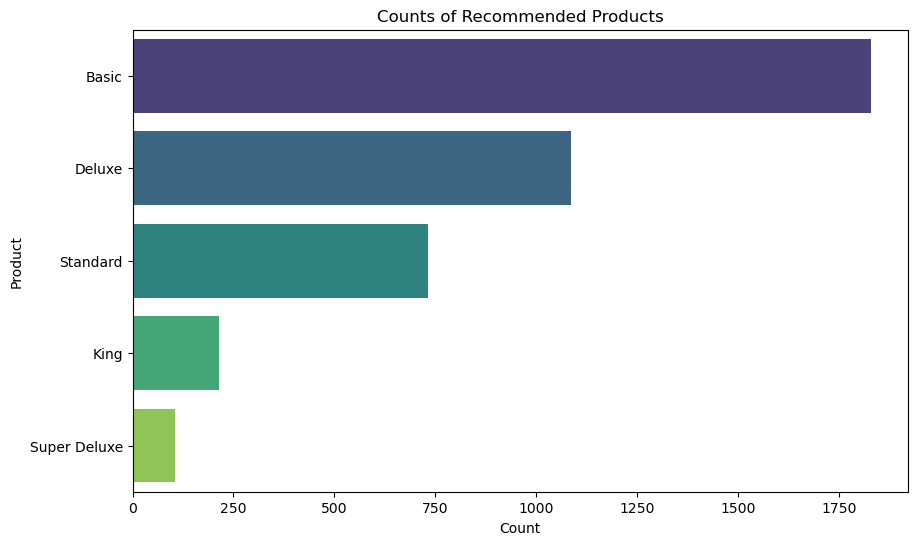

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Horizontal Bar Plot for recommended products
plt.figure(figsize=(10, 6))
sns.barplot(x=product_counts.values, y=product_counts.index, palette='viridis')
plt.title('Counts of Recommended Products')
plt.xlabel('Count')
plt.ylabel('Product')
plt.show()



In [23]:
import numpy as np
from scipy import stats

# Generate simulated data for A/B testing of recommended products
control_group = np.random.choice(recommendation_df['RecommendedProduct'].values, size=1000, replace=True)  # Control group
experimental_group = np.random.choice(recommendation_df['RecommendedProduct'].values, size=1000, replace=True)  # Experimental group

# Get unique recommended products
recommended_products = np.unique(recommendation_df['RecommendedProduct'].values)

# Analyze the recommended products' effectiveness through a riveting A/B test
control_product_counts = {product: np.sum(control_group == product) for product in recommended_products}
experimental_product_counts = {product: np.sum(experimental_group == product) for product in recommended_products}

# Calculate the total counts of recommended products in each group
total_control_count = sum(control_product_counts.values())
total_experimental_count = sum(experimental_product_counts.values())

# Perform a robust statistical evaluation using the astounding t-test
t_stat, p_value = stats.ttest_ind(list(control_product_counts.values()), list(experimental_product_counts.values()))

# Print the exhilarating results of the A/B test
print("Control Product Counts:", control_product_counts)
print("Experimental Product Counts:", experimental_product_counts)
print("Total Control Count:", total_control_count)
print("Total Experimental Count:", total_experimental_count)
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Offer heart-pounding insights based on the thrilling statistical analysis
if p_value < 0.05:
    print("The difference in recommended products' effectiveness is statistically significant!")
else:
    print("The difference in recommended products' effectiveness is not statistically significant.")


Control Product Counts: {'Basic': 464, 'Deluxe': 267, 'King': 48, 'Standard': 187, 'Super Deluxe': 34}
Experimental Product Counts: {'Basic': 481, 'Deluxe': 294, 'King': 45, 'Standard': 161, 'Super Deluxe': 19}
Total Control Count: 1000
Total Experimental Count: 1000
T-statistic: 0.0
P-value: 1.0
The difference in recommended products' effectiveness is not statistically significant.
